In [1]:
import pandas as pd

**IMPORT THE CSV FILE**

In [5]:
original_df = pd.read_csv("/Users/myiphone/Downloads/orders_export_1.csv")
original_df

,Name,Paid at,Fulfillment Status,Fulfilled at,Currency,Total,Lineitem quantity,Lineitem name,Lineitem price,Shipping Country
0,#8671,2023-02-28 22:33:58 +0100,fulfilled,2023-03-01 10:08:02 +0100,GBP,42.30,1,NMN,34.00,SE
1,#8670,2023-02-28 22:27:25 +0100,fulfilled,2023-03-01 09:18:03 +0100,GBP,129.56,6,Stabiliser,43.19,CH
2,#8669,2023-02-28 22:09:58 +0100,fulfilled,2023-03-01 14:37:02 +0100,GBP,39.60,1,Stabiliser M,39.60,GB
3,#8668,2023-02-28 21:53:50 +0100,fulfilled,2023-03-01 09:44:02 +0100,GBP,60.52,1,Collagen Activator M,60.52,DE
4,#8667,2023-02-28 21:14:11 +0100,fulfilled,2023-03-01 10:06:02 +0100,GBP,30.70,1,NMN M,30.70,IE
...,...,...,...,...,...,...,...,...,...,...
8651,#1131,NaN,NaN,NaN,NaN,NaN,2,NMN,52.00,NaN
8652,#1130,2022-03-07 20:13:49 +0100,fulfilled,2022-03-07 21:49:04 +0100,CHF,202.50,3,Bundle,135.00,CH
8653,#1129,2022-03-06 17:18:06 +0100,fulfilled,2022-03-07 10:46:07 +0100,CHF,540.00,4,Bundle,135.00,CH
8654,#1128,2022-03-03 16:10:43 +0100,fulfilled,2022-03-03 16:38:04 +0100,CHF,135.00,1,Bundle,135.00,AT


**NOW WE START WITH OUR EDA**

In [6]:
# check columns included in dataframe
display(original_df.columns)

Index(['Name', 'Paid at', 'Fulfillment Status', 'Fulfilled at', 'Currency',
       'Total', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Shipping Country'],
      dtype='object')

In [7]:
# check shape of dataset, i.e. no. of columns and rows
original_df.shape

(8656, 10)

In [8]:
# check for possible missing values and type of values
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8656 entries, 0 to 8655
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                8656 non-null   object 
 1   Paid at             7356 non-null   object 
 2   Fulfillment Status  7543 non-null   object 
 3   Fulfilled at        7462 non-null   object 
 4   Currency            7543 non-null   object 
 5   Total               7543 non-null   float64
 6   Lineitem quantity   8656 non-null   int64  
 7   Lineitem name       8656 non-null   object 
 8   Lineitem price      8656 non-null   float64
 9   Shipping Country    7470 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 676.4+ KB


**Data-types**  
- object: We see that we have a lot of object data-types in our dataset. This means, we have strings (meaning text) or mixed data-types in these columns.   

 **Missing values**  
- Below the header *Non-Null* we see how many non-null values we have per column.  Only in columns 0, 6, 7 and 8, we have full values, i.e. 8656. In all remaining columns, we have missing values.

In [9]:
# check result again - NO CHANGE AS NOTHING IS DROPPED SO FAR
original_df.head()

,Name,Paid at,Fulfillment Status,Fulfilled at,Currency,Total,Lineitem quantity,Lineitem name,Lineitem price,Shipping Country
0,#8671,2023-02-28 22:33:58 +0100,fulfilled,2023-03-01 10:08:02 +0100,GBP,42.30,1,NMN,34.00,SE
1,#8670,2023-02-28 22:27:25 +0100,fulfilled,2023-03-01 09:18:03 +0100,GBP,129.56,6,Stabiliser,43.19,CH
2,#8669,2023-02-28 22:09:58 +0100,fulfilled,2023-03-01 14:37:02 +0100,GBP,39.60,1,Stabiliser M,39.60,GB
3,#8668,2023-02-28 21:53:50 +0100,fulfilled,2023-03-01 09:44:02 +0100,GBP,60.52,1,Collagen Activator M,60.52,DE
4,#8667,2023-02-28 21:14:11 +0100,fulfilled,2023-03-01 10:06:02 +0100,GBP,30.70,1,NMN M,30.70,IE


**Rename Columns**  
- Now we will rename the columns and remove white spaces from column names

In [11]:
# First a dictionary is created to map the old column names to new names
column_names = {'Name': 'order_no.', 'Paid at': 'payment_date', 'Fulfillment Status': 'fulfillment_status', 
                'Fulfilled at': 'fulfillment_date', 'Currency': 'currency', 'Total': 'total_amount_paid', 
                'Lineitem quantity': 'quantity', 'Lineitem name': 'item_name', 'Lineitem price': 'item_price', 
                'Shipping Country': 'shipping_country'}

# Now we remove leading/trailing white spaces from column names
column_names = {old_name.strip(): new_name.strip() for old_name, new_name in column_names.items()}

# Then we rename the columns
original_df = original_df.rename(columns=column_names)

print(original_df.columns)

Index(['order_no.', 'payment_date', 'fulfillment_status', 'fulfillment_date',
       'currency', 'total_amount_paid', 'quantity', 'item_name', 'item_price',
       'shipping_country'],
      dtype='object')


In [13]:
display(original_df.head())

,order_no.,payment_date,fulfillment_status,fulfillment_date,currency,total_amount_paid,quantity,item_name,item_price,shipping_country
0,#8671,2023-02-28 22:33:58 +0100,fulfilled,2023-03-01 10:08:02 +0100,GBP,42.30,1,NMN,34.00,SE
1,#8670,2023-02-28 22:27:25 +0100,fulfilled,2023-03-01 09:18:03 +0100,GBP,129.56,6,Stabiliser,43.19,CH
2,#8669,2023-02-28 22:09:58 +0100,fulfilled,2023-03-01 14:37:02 +0100,GBP,39.60,1,Stabiliser M,39.60,GB
3,#8668,2023-02-28 21:53:50 +0100,fulfilled,2023-03-01 09:44:02 +0100,GBP,60.52,1,Collagen Activator M,60.52,DE
4,#8667,2023-02-28 21:14:11 +0100,fulfilled,2023-03-01 10:06:02 +0100,GBP,30.70,1,NMN M,30.70,IE


In [110]:
original_df.head()

,order_no.,payment_date,fulfillment_status,fulfillment_date,currency,total_amount_paid,quantity,item_name,item_price,shipping_country
0,#8671,2023-02-28 21:33:58,fulfilled,2023-03-01 09:08:02,GBP,42.30,1,NMN,34.00,SE
1,#8670,2023-02-28 21:27:25,fulfilled,2023-03-01 08:18:03,GBP,129.56,6,Stabiliser,43.19,CH
2,#8669,2023-02-28 21:09:58,fulfilled,2023-03-01 13:37:02,GBP,39.60,1,Stabiliser M,39.60,GB
3,#8668,2023-02-28 20:53:50,fulfilled,2023-03-01 08:44:02,GBP,60.52,1,Collagen Activator M,60.52,DE
4,#8667,2023-02-28 20:14:11,fulfilled,2023-03-01 09:06:02,GBP,30.70,1,NMN M,30.70,IE


In [118]:
# check number of unique values
print(original_df['item_name'].nunique())

64


In [119]:
# print all unique values of the "item_name" column
print(original_df['item_name'].unique())

['NMN' 'Stabiliser' 'Stabiliser M' 'Collagen Activator M' 'NMN M'
 'Longevity Bundle Q' 'Longevity Bundle A' 'Vitality Bundle'
 'DNA & Bioage Test' 'Booster' 'NMN A Refill' 'Bundle A Refill'
 'Collagen Activator' 'Longevity Bundle M' 'Vitality Bundle Q' 'NMN Q'
 'Vitality Bundle A' 'Vitality Bundle M Refill' 'NMN M Refill'
 'Booster M Refill' 'Vitality Bundle Q Refill' 'NMN Q Refill'
 'Vitality Bundle M' 'Longevity Bundle' 'NMN A' 'Booster A' 'Booster Q'
 'Stabiliser Q' 'Collagen Activator M - -' 'Booster A Refill' 'Booster M'
 'Stabiliser A' 'Longevity Bundle M Refill' 'Collagen Activator A'
 'Longevity Bundle Q Refill' 'Bundle M Refill' 'Bundle Q Refill'
 'Stabiliser Q Refill' 'Longevity Bundle A Refill' 'Booster Q Refill'
 'DNA & Bioage' 'Vitality Bundle A Refill' 'Stabiliser M Refill'
 'Collagen Activator Q' 'Bundle M' 'NMN Q - Default Title'
 'Booster Q - Default Title' 'NMN M - Default Title'
 'Bundle A Refill - Default Title' 'Bundle' 'Activator' 'Bundle Q'
 'Bundle A' 'Bundle Q

In [187]:
#filter for currency other than GBP
currency_df = original_df[original_df["currency"] != "GBP"]
display(currency_df)

,order_no.,payment_date,fulfillment_status,fulfillment_date,currency,total_amount_paid,quantity,item_name,item_price,shipping_country,subscription_type,product,month
7,#8665,NaT,NaN,NaT,NaN,NaN,1,Longevity Bundle A,1578.82,NaN,None,Longevity Bundle A,NaN
16,#8656,NaT,fulfilled,2023-03-01 06:57:02,EUR,0.0,1,NMN A Refill,0.00,FR,None,NMN A Refill,3.0
17,#8655,NaT,fulfilled,2023-03-01 07:10:02,ZAR,0.0,1,Bundle A Refill,0.00,ZA,None,Bundle A Refill,3.0
18,#8654,NaT,fulfilled,2023-03-01 08:25:03,CHF,0.0,1,Bundle A Refill,0.00,CH,None,Bundle A Refill,3.0
23,#8650,NaT,NaN,NaT,NaN,NaN,1,Collagen Activator,69.00,NaN,None,Collagen Activator,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,#1131,NaT,NaN,NaT,NaN,NaN,2,NMN,52.00,NaN,None,NMN,NaN
8652,#1130,2022-03-07 19:13:49,fulfilled,2022-03-07 20:49:04,CHF,202.5,3,Bundle,135.00,CH,None,Bundle,3.0
8653,#1129,2022-03-06 16:18:06,fulfilled,2022-03-07 09:46:07,CHF,540.0,4,Bundle,135.00,CH,None,Bundle,3.0
8654,#1128,2022-03-03 15:10:43,fulfilled,2022-03-03 15:38:04,CHF,135.0,1,Bundle,135.00,AT,None,Bundle,3.0


In [124]:
original_df[original_df['total_amount_paid'] ==original_df['quantity']*original_df['item_price']]

,order_no.,payment_date,fulfillment_status,fulfillment_date,currency,total_amount_paid,quantity,item_name,item_price,shipping_country,subscription_type,product
2,#8669,2023-02-28 21:09:58,fulfilled,2023-03-01 13:37:02,GBP,39.60,1,Stabiliser M,39.60,GB,None,Stabiliser M
3,#8668,2023-02-28 20:53:50,fulfilled,2023-03-01 08:44:02,GBP,60.52,1,Collagen Activator M,60.52,DE,None,Collagen Activator M
4,#8667,2023-02-28 20:14:11,fulfilled,2023-03-01 09:06:02,GBP,30.70,1,NMN M,30.70,IE,None,NMN M
5,#8666,2023-02-28 20:14:05,fulfilled,2023-03-01 08:41:03,GBP,62.10,1,Collagen Activator M,62.10,GB,None,Collagen Activator M
10,#8662,2023-02-28 18:12:02,fulfilled,2023-02-28 21:43:03,GBP,68.00,2,NMN,34.00,GB,None,NMN
...,...,...,...,...,...,...,...,...,...,...,...,...
8645,#1136,2022-03-14 05:46:41,fulfilled,2022-03-15 08:03:32,CHF,344.25,3,Bundle,114.75,CH,None,Bundle
8647,#1134,2022-03-11 06:29:05,partial,NaN,CHF,1242.48,12,Bundle,103.54,BG,None,Bundle
8649,#1132,2022-03-08 08:47:30,fulfilled,2022-03-09 11:21:50,CHF,352.86,3,Bundle,117.62,GB,None,Bundle
8653,#1129,2022-03-06 16:18:06,fulfilled,2022-03-07 09:46:07,CHF,540.00,4,Bundle,135.00,CH,None,Bundle


# Fulfillment

In [127]:
# check no.of values for each fulfillment status
fulfillment_status_counts = original_df['fulfillment_status'].value_counts()
print(fulfillment_status_counts)

fulfilled      7462
unfulfilled      76
partial           5
Name: fulfillment_status, dtype: int64


In [128]:
# filter to check only for partial orders
partial_df = original_df[original_df["fulfillment_status"] == "partial"]
display(partial_df)

,order_no.,payment_date,fulfillment_status,fulfillment_date,currency,total_amount_paid,quantity,item_name,item_price,shipping_country,subscription_type,product,month
8597,#1183,2022-04-14 09:48:20,partial,NaT,CHF,1215.00,12,Bundle,101.25,CH,None,Bundle,NaN
8604,#1177,2022-04-12 21:52:03,partial,NaT,CHF,998.59,12,Bundle,104.02,DE,None,Bundle,NaN
8610,#1171,2022-04-10 20:49:56,partial,NaT,CHF,1093.50,12,Bundle,101.25,CH,None,Bundle,NaN
8644,#1137,2022-03-14 08:28:06,partial,NaT,CHF,1215.00,12,Bundle,101.25,CH,None,Bundle,NaN
8647,#1134,2022-03-11 06:29:05,partial,NaT,CHF,1242.48,12,Bundle,103.54,BG,None,Bundle,NaN


In [129]:
display(original_df)

,order_no.,payment_date,fulfillment_status,fulfillment_date,currency,total_amount_paid,quantity,item_name,item_price,shipping_country,subscription_type,product,month
0,#8671,2023-02-28 21:33:58,fulfilled,2023-03-01 09:08:02,GBP,42.30,1,NMN,34.00,SE,None,NMN,3.0
1,#8670,2023-02-28 21:27:25,fulfilled,2023-03-01 08:18:03,GBP,129.56,6,Stabiliser,43.19,CH,None,Stabiliser,3.0
2,#8669,2023-02-28 21:09:58,fulfilled,2023-03-01 13:37:02,GBP,39.60,1,Stabiliser M,39.60,GB,None,Stabiliser M,3.0
3,#8668,2023-02-28 20:53:50,fulfilled,2023-03-01 08:44:02,GBP,60.52,1,Collagen Activator M,60.52,DE,None,Collagen Activator M,3.0
4,#8667,2023-02-28 20:14:11,fulfilled,2023-03-01 09:06:02,GBP,30.70,1,NMN M,30.70,IE,None,NMN M,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,#1131,NaT,NaN,NaT,NaN,NaN,2,NMN,52.00,NaN,None,NMN,NaN
8652,#1130,2022-03-07 19:13:49,fulfilled,2022-03-07 20:49:04,CHF,202.50,3,Bundle,135.00,CH,None,Bundle,3.0
8653,#1129,2022-03-06 16:18:06,fulfilled,2022-03-07 09:46:07,CHF,540.00,4,Bundle,135.00,CH,None,Bundle,3.0
8654,#1128,2022-03-03 15:10:43,fulfilled,2022-03-03 15:38:04,CHF,135.00,1,Bundle,135.00,AT,None,Bundle,3.0


**New DF for Fulfillments**

In [130]:
# grouped the existing df, keeping the columns I wanted and created a new df
grouped_df = original_df.groupby(['fulfillment_status', 'currency', 'payment_date', 'fulfillment_date', 'shipping_country'])

# counted number of orders in each group
fulfillment_df = grouped_df.size().reset_index(name='count')
display(fulfillment_df)


,fulfillment_status,currency,payment_date,fulfillment_date,shipping_country,count
0,fulfilled,CHF,2022-03-01 14:17:39,2022-03-02 06:35:04,DE,1
1,fulfilled,CHF,2022-03-03 15:10:43,2022-03-03 15:38:04,AT,1
2,fulfilled,CHF,2022-03-06 16:18:06,2022-03-07 09:46:07,CH,1
3,fulfilled,CHF,2022-03-07 19:13:49,2022-03-07 20:49:04,CH,1
4,fulfilled,CHF,2022-03-07 22:42:22,2022-03-08 07:44:04,CH,1
...,...,...,...,...,...,...
7205,fulfilled,GBP,2023-02-28 20:14:11,2023-03-01 09:06:02,IE,1
7206,fulfilled,GBP,2023-02-28 20:53:50,2023-03-01 08:44:02,DE,1
7207,fulfilled,GBP,2023-02-28 21:09:58,2023-03-01 13:37:02,GB,1
7208,fulfilled,GBP,2023-02-28 21:27:25,2023-03-01 08:18:03,CH,1


In [131]:
fulfillment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fulfillment_status  7210 non-null   object        
 1   currency            7210 non-null   object        
 2   payment_date        7210 non-null   datetime64[ns]
 3   fulfillment_date    7210 non-null   datetime64[ns]
 4   shipping_country    7210 non-null   object        
 5   count               7210 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 338.1+ KB


In [132]:
# checked for null values
null_values = fulfillment_df[['fulfillment_status', 'currency', 'payment_date', 'fulfillment_date', 'shipping_country']].isnull().sum()
print(null_values)


fulfillment_status    0
currency              0
payment_date          0
fulfillment_date      0
shipping_country      0
dtype: int64


In [133]:
# checked for missing values
missing_values = fulfillment_df.isna().sum()
print(missing_values)

fulfillment_status    0
currency              0
payment_date          0
fulfillment_date      0
shipping_country      0
count                 0
dtype: int64


In [16]:
# created a new df with selected columns
df_f1 = original_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# grouped the df by my chosen columns, i.e.payment_date, fulfillment_date, currency, and shipping_country
grouped = df_f1.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# counted the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()


In [17]:
display(result.head())

,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-03-01 15:17:39 +0100,2022-03-02 07:35:04 +0100,CHF,DE,fulfilled,1
1,2022-03-03 16:10:43 +0100,2022-03-03 16:38:04 +0100,CHF,AT,fulfilled,1
2,2022-03-06 17:18:06 +0100,2022-03-07 10:46:07 +0100,CHF,CH,fulfilled,1
3,2022-03-07 20:13:49 +0100,2022-03-07 21:49:04 +0100,CHF,CH,fulfilled,1
4,2022-03-07 23:42:22 +0100,2022-03-08 08:44:04 +0100,CHF,CH,fulfilled,1


****FULFILLMENT DATA PER MONTH (03.2022 - 02.2023)**** 

**MARCH 2022**

In [136]:
# filtered the df for March 2022 in payment_date column
mar_2022_df = original_df[(original_df['payment_date'].dt.month == 3) & (original_df['payment_date'].dt.year == 2022)]

# created a new df with selected columns I wanted
mar_2022_df_new = mar_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# grouped the df by payment_date, fulfillment_date, currency, and shipping_country
grouped = mar_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# counted no. of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-03-01 14:17:39,2022-03-02 06:35:04,CHF,DE,fulfilled,1
1,2022-03-03 15:10:43,2022-03-03 15:38:04,CHF,AT,fulfilled,1
2,2022-03-06 16:18:06,2022-03-07 09:46:07,CHF,CH,fulfilled,1
3,2022-03-07 19:13:49,2022-03-07 20:49:04,CHF,CH,fulfilled,1
4,2022-03-07 22:42:22,2022-03-08 07:44:04,CHF,CH,fulfilled,1
5,2022-03-08 08:47:30,2022-03-09 11:21:50,CHF,GB,fulfilled,1
6,2022-03-09 14:57:21,2022-03-09 19:23:04,CHF,CH,fulfilled,1
7,2022-03-11 20:19:13,2022-03-11 21:23:03,CHF,CH,fulfilled,1
8,2022-03-14 05:46:41,2022-03-15 08:03:32,CHF,CH,fulfilled,1
9,2022-03-15 06:20:24,2022-03-15 15:11:05,CHF,CH,fulfilled,1


**CALCULATIONS OF AVERAGE WAITING TIMES, AVERAGE QUANTITY BOUGHT, MOST SHIPPED TO COUNTRY & MOST CURRENCY USED BY EACH MONTH**

In [138]:
# Converted "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [18]:
# check data types of payment_date and fulfillment_date columns
print(original_df[['payment_date', 'fulfillment_date']].dtypes)

payment_date        object
fulfillment_date    object
dtype: object


In [140]:
# filtered the dataframe for March 2022 in payment_date column
mar_2022_df = original_df[(original_df['payment_date'].dt.month == 3) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
mar_2022_df_new = mar_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
mar_2022_df_new['waiting_time'] = (mar_2022_df_new['fulfillment_date'] - mar_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = mar_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = mar_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = mar_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = mar_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in March 2022:", avg_waiting_time, "days")
print("Average quantity bought in March 2022:", avg_quantity)
print("Most shipped country in March 2022:", most_shipped_country)
print("Most used currency in March 2022:", most_used_currency)


Average waiting time in March 2022: 0.16216216216216217 days
Average quantity bought in March 2022: 2.4615384615384617
Most shipped country in March 2022: CH
Most used currency in March 2022: CHF


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/2007884466.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar_2022_df_new['waiting_time'] = (mar_2022_df_new['fulfillment_date'] - mar_2022_df_new['payment_date']).dt.days


**APRIL 2022**

In [141]:
# filter the dataframe for Apr 2022 in payment_date column
apr_2022_df = original_df[(original_df['payment_date'].dt.month == 4) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
apr_2022_df_new = apr_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = apr_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-04-02 22:00:16,2022-04-05 05:30:04,CHF,GB,fulfilled,1
1,2022-04-03 13:22:06,2022-04-04 08:36:04,CHF,CH,fulfilled,1
2,2022-04-05 22:03:38,2022-04-10 07:44:03,CHF,GB,fulfilled,1
3,2022-04-07 20:33:35,2022-04-08 07:34:04,CHF,CH,fulfilled,1
4,2022-04-08 09:43:42,2022-04-08 14:29:04,CHF,DE,fulfilled,1
5,2022-04-11 10:34:56,2022-04-11 13:18:06,CHF,CH,fulfilled,1
6,2022-04-12 10:50:15,2022-04-13 06:37:24,CHF,CH,fulfilled,1
7,2022-04-12 13:53:13,2022-04-12 18:02:05,CHF,IT,fulfilled,1
8,2022-04-12 17:59:33,2022-04-12 20:31:04,CHF,IT,fulfilled,1
9,2022-04-12 18:23:38,2022-04-12 20:53:04,CHF,CH,fulfilled,1


In [142]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [143]:
# filter the dataframe for Apr 2022 in payment_date column
apr_2022_df = original_df[(original_df['payment_date'].dt.month == 4) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
apr_2022_df_new = apr_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
apr_2022_df_new['waiting_time'] = (apr_2022_df_new['fulfillment_date'] - apr_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = apr_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = apr_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = apr_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = apr_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in April 2022:", avg_waiting_time, "days")
print("Average quantity bought in April 2022:", avg_quantity)
print("Most shipped country in April 2022:", most_shipped_country)
print("Most used currency in April 2022:", most_used_currency)


Average waiting time in April 2022: 0.4318181818181818 days
Average quantity bought in April 2022: 2.595744680851064
Most shipped country in April 2022: CH
Most used currency in April 2022: CHF


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/3305438310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apr_2022_df_new['waiting_time'] = (apr_2022_df_new['fulfillment_date'] - apr_2022_df_new['payment_date']).dt.days


**MAY 2022**

In [144]:
# filter the dataframe for May 2022 in payment_date column
may_2022_df = original_df[(original_df['payment_date'].dt.month == 5) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
may_2022_df_new = may_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = may_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-05-01 06:57:22,2022-05-03 18:05:04,CHF,GB,fulfilled,1
1,2022-05-01 14:42:44,2022-05-03 09:27:04,CHF,CH,fulfilled,1
2,2022-05-02 07:44:51,2022-05-04 06:15:04,CHF,CH,fulfilled,1
3,2022-05-02 08:37:09,2022-05-04 05:56:04,CHF,HR,fulfilled,1
4,2022-05-02 10:35:29,2022-05-03 12:39:07,CHF,GB,fulfilled,1
...,...,...,...,...,...,...
161,2022-05-30 20:11:23,2022-05-31 08:01:05,CHF,CH,fulfilled,1
162,2022-05-31 08:14:15,2022-05-31 12:38:04,CHF,DE,fulfilled,1
163,2022-05-31 15:35:28,2022-05-31 19:41:04,CHF,CH,fulfilled,1
164,2022-05-31 19:28:30,2022-06-01 09:54:03,CHF,CH,fulfilled,1


In [145]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [146]:
# filter the dataframe for May 2022 in payment_date column
may_2022_df = original_df[(original_df['payment_date'].dt.month == 5) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
may_2022_df_new = may_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
may_2022_df_new['waiting_time'] = (may_2022_df_new['fulfillment_date'] - may_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = may_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = may_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = may_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = may_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in May 2022:", avg_waiting_time, "days")
print("Average quantity bought in May 2022:", avg_quantity)
print("Most shipped country in May 2022:", most_shipped_country)
print("Most used currency in May 2022:", most_used_currency)


Average waiting time in May 2022: 0.3674698795180723 days
Average quantity bought in May 2022: 1.4518072289156627
Most shipped country in May 2022: CH
Most used currency in May 2022: CHF


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/1233478661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_2022_df_new['waiting_time'] = (may_2022_df_new['fulfillment_date'] - may_2022_df_new['payment_date']).dt.days


**JUNE 2022**

In [147]:
# filter the dataframe for June 2022 in payment_date column
jun_2022_df = original_df[(original_df['payment_date'].dt.month == 6) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
jun_2022_df_new = jun_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = jun_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-06-01 05:52:19,2022-06-01 09:36:04,CHF,GB,fulfilled,1
1,2022-06-01 08:12:57,2022-06-01 13:57:03,CHF,CH,fulfilled,1
2,2022-06-01 15:02:01,2022-06-03 11:42:04,CHF,CH,fulfilled,1
3,2022-06-01 17:58:09,2022-06-03 07:54:04,CHF,BE,fulfilled,1
4,2022-06-01 20:58:36,2022-06-04 12:29:22,CHF,GB,fulfilled,1
...,...,...,...,...,...,...
244,2022-06-30 10:25:20,2022-06-30 12:02:05,CHF,IT,fulfilled,1
245,2022-06-30 18:28:22,2022-07-01 08:37:03,CHF,CH,fulfilled,1
246,2022-06-30 19:43:26,2022-07-01 08:50:02,CHF,DE,fulfilled,1
247,2022-06-30 20:10:08,2022-07-01 08:42:03,CHF,CH,fulfilled,1


In [148]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [149]:
# filter the dataframe for June 2022 in payment_date column
jun_2022_df = original_df[(original_df['payment_date'].dt.month == 6) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
jun_2022_df_new = jun_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
jun_2022_df_new['waiting_time'] = (jun_2022_df_new['fulfillment_date'] - jun_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = jun_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = jun_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = jun_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = jun_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in June 2022:", avg_waiting_time, "days")
print("Average quantity bought in June 2022:", avg_quantity)
print("Most shipped country in June 2022:", most_shipped_country)
print("Most used currency in June 2022:", most_used_currency)


Average waiting time in June 2022: 0.5502008032128514 days
Average quantity bought in June 2022: 1.276
Most shipped country in June 2022: CH
Most used currency in June 2022: CHF


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/4097152082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jun_2022_df_new['waiting_time'] = (jun_2022_df_new['fulfillment_date'] - jun_2022_df_new['payment_date']).dt.days


**JULY 2022**

In [150]:
# filter the dataframe for July 2022 in payment_date column
jul_2022_df = original_df[(original_df['payment_date'].dt.month == 7) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
jul_2022_df_new = jul_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = jul_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result.head())


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-07-01 03:18:57,2022-07-01 18:44:02,CHF,NL,fulfilled,1
1,2022-07-01 05:22:30,2022-07-01 18:39:03,CHF,GB,fulfilled,1
2,2022-07-01 05:22:32,2022-07-01 18:45:03,CHF,BE,fulfilled,1
3,2022-07-01 08:05:21,2022-07-01 18:00:03,CHF,CH,fulfilled,1
4,2022-07-01 10:03:37,2022-07-01 18:33:02,CHF,CH,fulfilled,1


In [151]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [152]:
# filter the dataframe for July 2022 in payment_date column
jul_2022_df = original_df[(original_df['payment_date'].dt.month == 7) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
jul_2022_df_new = jul_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
jul_2022_df_new['waiting_time'] = (jul_2022_df_new['fulfillment_date'] - jul_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = jul_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = jul_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = jul_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = jul_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in July 2022:", avg_waiting_time, "days")
print("Average quantity bought in July 2022:", avg_quantity)
print("Most shipped country in July 2022:", most_shipped_country)
print("Most used currency in July 2022:", most_used_currency)


Average waiting time in July 2022: 7.950704225352113 days
Average quantity bought in July 2022: 1.4548611111111112
Most shipped country in July 2022: CH
Most used currency in July 2022: CHF


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/3408572588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jul_2022_df_new['waiting_time'] = (jul_2022_df_new['fulfillment_date'] - jul_2022_df_new['payment_date']).dt.days


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/2734882753.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  jul_2022_df_new['week'] = jul_2022_df_new['payment_date'].dt.week
/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/2734882753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jul_2022_df_new['week'] = jul_2022_df_new['payment_date'].dt.week


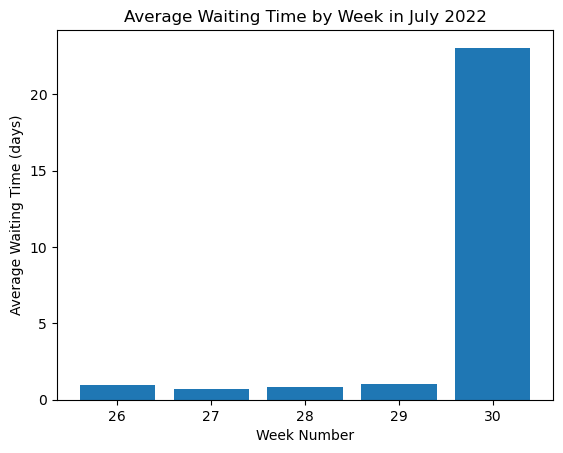

In [154]:
# create a new column with the week number
jul_2022_df_new['week'] = jul_2022_df_new['payment_date'].dt.week

# group the dataframe by week and calculate mean waiting time for each week
mean_waiting_time = jul_2022_df_new.groupby('week')['waiting_time'].mean()

# create a bar chart with week number as x-axis and mean waiting time as y-axis
plt.bar(mean_waiting_time.index, mean_waiting_time.values)
plt.xlabel('Week Number')
plt.ylabel('Average Waiting Time (days)')
plt.title('Average Waiting Time by Week in July 2022')
plt.show()

In [155]:
import datetime

# define the year and week number
year = 2022
week_num = 30

# calculate the start date and end date of the week
start_date = datetime.datetime.fromisocalendar(year, week_num, 1)
end_date = datetime.datetime.fromisocalendar(year, week_num, 7)

# print the start date and end date of the week
print("Dates included in week 30th (July 2022):")
print(start_date.strftime("%Y-%m-%d"), "to", end_date.strftime("%Y-%m-%d"))

Dates included in week 30th (July 2022):
2022-07-25 to 2022-07-31


**We filter for dates 24.07.2022 to 31.07.2022. Including one previous day to get a better picture.**

In [156]:
# filter the dataframe to include only the dates between 2022-07-24 and 2022-07-31
start_date = '2022-07-24'
end_date = '2022-07-31'
mask = (jul_2022_df_new['payment_date'] >= start_date) & (jul_2022_df_new['payment_date'] <= end_date)
filtered_df = jul_2022_df_new.loc[mask]

# print the filtered dataframe
display(filtered_df.head())

,payment_date,fulfillment_date,currency,shipping_country,quantity,waiting_time,week
7837,2022-07-30 19:08:44,2022-09-08 19:12:03,CHF,DE,1,40.0,30
7839,2022-07-30 14:38:24,2022-09-08 19:10:03,CHF,GB,1,40.0,30
7840,2022-07-30 14:05:50,2022-09-08 19:10:03,CHF,CH,1,40.0,30
7841,2022-07-30 13:51:30,2022-08-02 08:18:03,CHF,CH,1,2.0,30
7842,2022-07-30 12:20:09,2022-09-08 19:08:02,CHF,CH,1,40.0,30


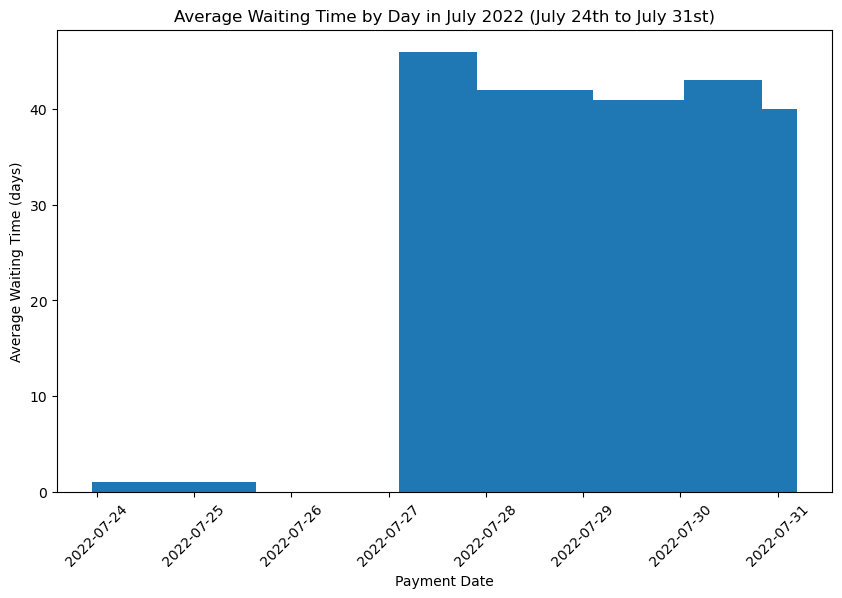

In [158]:
# filter the dataframe to include only the dates between 2022-07-24 and 2022-07-31
start_date = '2022-07-24'
end_date = '2022-07-31'
mask = (jul_2022_df_new['payment_date'] >= start_date) & (jul_2022_df_new['payment_date'] <= end_date)
filtered_df = jul_2022_df_new.loc[mask]

# group the filtered dataframe by payment date and calculate the mean waiting time for each day
mean_waiting_time = filtered_df.groupby('payment_date')['waiting_time'].mean()

# create a bigger bar chart with payment date as x-axis and mean waiting time as y-axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(mean_waiting_time.index, mean_waiting_time.values)
ax.set_xlabel('Payment Date')
ax.set_ylabel('Average Waiting Time (days)')
ax.set_title('Average Waiting Time by Day in July 2022 (July 24th to July 31st)')

# set x-axis labels rotation to 45 degrees
plt.xticks(rotation=45)

plt.show()

**Filtering to see only 26.07.22 as that shows nothing**

In [159]:
# filter the dataframe to only show data for 26.07.2022
filtered_df = jul_2022_df_new.loc[jul_2022_df_new['payment_date'] == '2022-07-26']

# calculate the waiting time for the filtered dataframe
waiting_time = filtered_df['waiting_time'].mean()

# print the waiting time for 26.07.2022
print("Average waiting time on 26.07.2022:", waiting_time, "days")

Average waiting time on 26.07.2022: nan days


**There seem to be missing values for this date**

In [160]:
# filter the dataframe to only show data from 27th to 31st July 2022
filtered_df = jul_2022_df_new.loc[(jul_2022_df_new['payment_date'] >= '2022-07-27') & (jul_2022_df_new['payment_date'] <= '2022-07-31')]

# calculate the average waiting time for the filtered dataframe
waiting_time = filtered_df['waiting_time'].mean()

# print the average waiting time for 27th to 31st July 2022
print("Average waiting time from 27th to 31st July 2022:", waiting_time, "days")

Average waiting time from 27th to 31st July 2022: 27.09375 days


In [161]:
# filter the dataframe to only show data from 1st to 31st July 2022
filtered_df = jul_2022_df_new.loc[(jul_2022_df_new['payment_date'] >= '2022-07-01') & (jul_2022_df_new['payment_date'] <= '2022-07-31')]

# calculate the average waiting time for the filtered dataframe
waiting_time = filtered_df['waiting_time'].mean()

# print the average waiting time for 1st to 31st July 2022
print("Average waiting time from 1st to 31st July 2022:", waiting_time, "days")

Average waiting time from 1st to 31st July 2022: 6.916058394160584 days


In [162]:
# filter the dataframe for July 2022 in payment_date column
jul_2022_df = original_df[(original_df['payment_date'].dt.month == 7) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
jul_2022_df_new_1 = jul_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status', 'quantity', 'item_name', 'order_no.']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = jul_2022_df_new_1.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity', 'item_name', 'order_no.'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result.head())

,payment_date,fulfillment_date,currency,shipping_country,quantity,item_name,order_no.,fulfillment_status,count
0,2022-07-01 03:18:57,2022-07-01 18:44:02,CHF,NL,1,Bundle,#1637,fulfilled,1
1,2022-07-01 05:22:30,2022-07-01 18:39:03,CHF,GB,1,Bundle M - -,#1638,fulfilled,1
2,2022-07-01 05:22:32,2022-07-01 18:45:03,CHF,BE,1,Bundle M - -,#1639,fulfilled,1
3,2022-07-01 08:05:21,2022-07-01 18:00:03,CHF,CH,1,Bundle,#1640,fulfilled,1
4,2022-07-01 10:03:37,2022-07-01 18:33:02,CHF,CH,1,NMN Q,#1641,fulfilled,1


In [165]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [166]:
# Convert "payment_date" column to datetime format
original_df['payment_date'] = pd.to_datetime(original_df['payment_date'])

**Now we check average waiting time for each country**

In [168]:
# group the dataframe by 'shipping_country'
grouped_df = jul_2022_df_new_1.groupby('shipping_country')

# compute the average waiting time for each country
avg_waiting_time = grouped_df['fulfillment_date', 'payment_date'].apply(lambda x: (x['fulfillment_date'] - x['payment_date']).mean())

# compute the list of order numbers and item names for each country
orders_and_items = grouped_df[['order_no.', 'item_name']].apply(lambda x: list(zip(x['order_no.'], x['item_name'])))

# combine the results into a single dataframe
result_df = pd.DataFrame({'avg_waiting_time': avg_waiting_time, 'orders_and_items': orders_and_items})

# print the result
display(result_df)

/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/1533550763.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_waiting_time = grouped_df['fulfillment_date', 'payment_date'].apply(lambda x: (x['fulfillment_date'] - x['payment_date']).mean())


,avg_waiting_time,orders_and_items
shipping_country,,
AT,3 days 05:57:32,"[(#1888, Bundle M - -), (#1797, Bundle), (#179..."
BE,10 days 01:27:36.500000,"[(#1931, Bundle), (#1708, Bundle), (#1701, Bun..."
CH,8 days 20:29:40.296052631,"[(#1933, NMN), (#1929, Bundle), (#1927, Bundle..."
DE,6 days 05:36:03.605263157,"[(#1922, Bundle), (#1895, NMN), (#1890, Bundle..."
DK,41 days 12:46:30,"[(#1891, Bundle)]"
FI,0 days 01:53:52,"[(#1763, Bundle)]"
FR,2 days 04:25:01.125000,"[(#1902, Booster), (#1815, Bundle), (#1799, Bu..."
GB,10 days 15:57:02.630434782,"[(#1932, Bundle), (#1930, NMN), (#1925, Bundle..."
HK,0 days 03:43:39,"[(#1882, Booster)]"


In [169]:
import datetime

# define the year and week number
year = 2022
week_num = 29

# calculate the start date and end date of the week
start_date = datetime.datetime.fromisocalendar(year, week_num, 1)
end_date = datetime.datetime.fromisocalendar(year, week_num, 7)

# print the start date and end date of the week
print("Dates included in week 29th (July 2022):")
print(start_date.strftime("%Y-%m-%d"), "to", end_date.strftime("%Y-%m-%d"))

Dates included in week 29th (July 2022):
2022-07-18 to 2022-07-24


**We check which products had higher sales during the last week of July**

In [170]:
# filter dataframe to include only dates between 2022-07-18 and 2022-07-24
filtered_df = jul_2022_df_new_1.loc[jul_2022_df_new_1['payment_date'].between('2022-07-18', '2022-07-24')]

# group the dataframe by 'item_name' and get the sum of 'quantity'
items_and_quantities = filtered_df.groupby('item_name')['quantity'].sum()

# print the result
print(items_and_quantities)

item_name
Booster         12
Bundle          13
Bundle A         1
Bundle M         3
Bundle M - -     1
Bundle Q         3
NMN              4
NMN M - -        1
Name: quantity, dtype: int64


**Now we plot that on a pie graph**

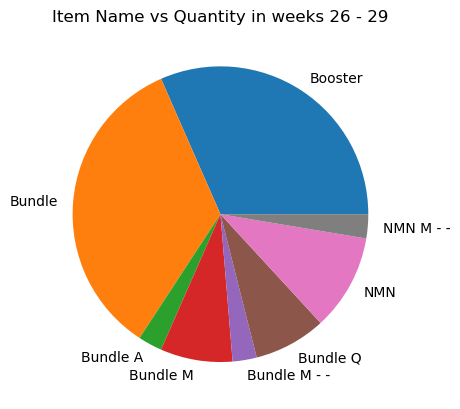

In [174]:
import matplotlib.pyplot as plt

# create a new dataframe with the item names and quantities
item_quantities_df = pd.DataFrame({'item_name': ['Booster', 'Bundle', 'Bundle A', 'Bundle M', 'Bundle M - -', 'Bundle Q', 'NMN', 'NMN M - -'],
                                   'quantity': [12, 13, 1, 3, 1, 3, 4, 1]})

# create a pie chart of item_name vs quantity
plt.pie(item_quantities_df['quantity'], labels=item_quantities_df['item_name'])

# set the chart title
plt.title('Item Name vs Quantity in weeks 26 - 29')

# show the chart
plt.show()


**POSSIBLE REASONS FOR THIS V HIGH WAITING TIME IN FULFILLMENT IN LAST WEEK OF JULY**

There could be many possible reasons why the average waiting time was high in the last week of July 2022, e.g. :

Seasonal demand: If the company's products are in high demand during July, it is possible that their warehouse was busier than usual, leading to longer waiting times for customers.

Supply chain issues: If there were any disruptions in the company's supply chain during July, it could have affected their ability to fulfill orders on time.

Staff shortages: If the company experienced staff shortages during July, it could have impacted their ability to fulfill orders quickly.

External events: As the co.'s HQs are in Switzerland and production and distribution facilities are in the UK, there could have been events in the UK or Switzerland that impacted the company's ability to fulfill orders. For example, if there was a weather event or a transportation strike, it could have led to delays in shipping or receiving goods. UK did experience record high levels of heat in summers in July and August 2022, which could have been a factor here.

**AUGUST 2022**

In [182]:
# filter the dataframe for Aug 2022 in payment_date column
aug_2022_df = original_df[(original_df['payment_date'].dt.month == 8) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
aug_2022_df_new = aug_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = aug_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-08-01 04:46:33,2022-08-02 08:19:03,CHF,AT,fulfilled,1
1,2022-08-01 05:23:50,2022-09-06 13:44:03,CHF,FR,fulfilled,1
2,2022-08-01 06:04:54,2022-08-03 05:46:03,CHF,GB,fulfilled,1
3,2022-08-01 06:04:54,2022-08-03 06:21:03,CHF,BE,fulfilled,1
4,2022-08-01 06:31:39,2022-09-06 15:29:03,CHF,IE,fulfilled,1
...,...,...,...,...,...,...
532,2022-08-31 09:38:30,2022-09-09 13:47:03,CHF,ES,fulfilled,1
533,2022-08-31 10:01:15,2022-09-09 14:14:03,CHF,GB,fulfilled,1
534,2022-08-31 12:14:06,2022-09-09 14:09:03,CHF,CH,fulfilled,1
535,2022-08-31 12:32:13,2022-09-06 18:16:03,CHF,HR,fulfilled,1


In [183]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [184]:
# filter the dataframe for Aug 2022 in payment_date column
aug_2022_df = original_df[(original_df['payment_date'].dt.month == 8) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
aug_2022_df_new = aug_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
aug_2022_df_new['waiting_time'] = (aug_2022_df_new['fulfillment_date'] - aug_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = aug_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = aug_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = aug_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = aug_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in Aug 2022:", avg_waiting_time, "days")
print("Average quantity bought in Aug 2022:", avg_quantity)
print("Most shipped country in Aug 2022:", most_shipped_country)
print("Most used currency in Aug 2022:", most_used_currency)


Average waiting time in Aug 2022: 18.6219739292365 days
Average quantity bought in Aug 2022: 1.588560885608856
Most shipped country in Aug 2022: CH
Most used currency in Aug 2022: CHF


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/3229168299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_2022_df_new['waiting_time'] = (aug_2022_df_new['fulfillment_date'] - aug_2022_df_new['payment_date']).dt.days


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/49099633.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  aug_2022_df_new['week'] = aug_2022_df_new['payment_date'].dt.week
/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_43329/49099633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_2022_df_new['week'] = aug_2022_df_new['payment_date'].dt.week


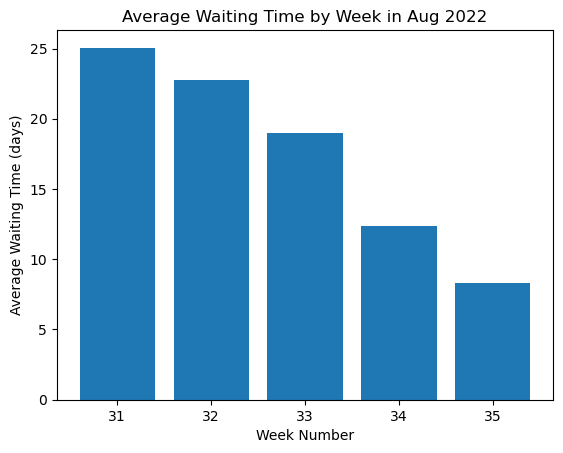

In [185]:
# create a new column with the week number
aug_2022_df_new['week'] = aug_2022_df_new['payment_date'].dt.week

# group the dataframe by week and calculate mean waiting time for each week
mean_waiting_time = aug_2022_df_new.groupby('week')['waiting_time'].mean()

# create a bar chart with week number as x-axis and mean waiting time as y-axis
plt.bar(mean_waiting_time.index, mean_waiting_time.values)
plt.xlabel('Week Number')
plt.ylabel('Average Waiting Time (days)')
plt.title('Average Waiting Time by Week in Aug 2022')
plt.show()

**POSSIBLE REASONS FOR THIS V HIGH WAITING TIME IN FULFILLMENT IN STARTING WEEKS OF AUGUST**

There could be many reasons why the average waiting time went up to 18 days in August 2022. Some possible explanations are:

Increase in order volume: August is a popular month for summer vacations and travel, which could lead to an increase in orders of these supplements that the company sells as customers stock up on products before going away. This increase in order volume could have overwhelmed the warehouse, causing delays in order processing and longer waiting times.

Increased demand: The pandemic has increased demand for supplements as people seek to boost their immune systems and overall health. This increased demand can lead to delays in processing orders and shipping products.

Quality control: The supplement industry is highly regulated, and companies must ensure that their products meet strict quality control standards. This can cause delays in manufacturing and shipping as companies take extra steps to ensure that their products meet these standards.

Supply chain disruptions: As explained in the reasons of July, this could have been a factor.

Labor shortages: Many companies have been struggling with labor shortages due to the pandemic, which could have affected the company's ability to process and fulfill orders in a timely manner.

Shipping delays: Shipping delays can also affect waiting times. If the company uses third-party logistics providers to ship their products, delays in shipping could lead to longer waiting times for customers.

However, we would need more data from the company to arrive at a conclusive reasoning behind these delays.

**SEPTEMBER 2022**

In [ ]:
# filter the dataframe for Sept 2022 in payment_date column
sep_2022_df = original_df[(original_df['payment_date'].dt.month == 9) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
sep_2022_df_new = sep_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = sep_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-09-01 04:33:07,2022-09-06 19:00:03,CHF,CH,fulfilled,1
1,2022-09-01 05:18:27,2022-09-02 10:35:03,CHF,GB,fulfilled,1
2,2022-09-01 05:18:28,2022-09-01 14:55:03,CHF,BE,fulfilled,1
3,2022-09-01 14:12:14,2022-09-09 14:00:03,CHF,CH,fulfilled,1
4,2022-09-01 15:38:00,2022-09-06 19:01:03,CHF,CH,fulfilled,1
...,...,...,...,...,...,...
632,2022-09-30 15:00:26,2022-09-30 16:12:03,CHF,PH,fulfilled,1
633,2022-09-30 15:08:20,2022-09-30 16:10:03,CHF,FR,fulfilled,1
634,2022-09-30 16:55:11,2022-10-01 05:30:03,CHF,CH,fulfilled,1
635,2022-09-30 19:04:52,2022-10-01 06:30:03,CHF,CH,fulfilled,1


In [ ]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [ ]:
# filter the dataframe for Sep 2022 in payment_date column
sep_2022_df = original_df[(original_df['payment_date'].dt.month == 9) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
sep_2022_df_new = sep_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
sep_2022_df_new['waiting_time'] = (sep_2022_df_new['fulfillment_date'] - sep_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = sep_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = sep_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = sep_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = sep_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in Sep 2022:", avg_waiting_time, "days")
print("Average quantity bought in Sep 2022:", avg_quantity)
print("Most shipped country in Sep 2022:", most_shipped_country)
print("Most used currency in Sep 2022:", most_used_currency)


Average waiting time in Sep 2022: 1.3108320251177394 days
Average quantity bought in Sep 2022: 1.35
Most shipped country in Sep 2022: CH
Most used currency in Sep 2022: CHF


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_30685/1105509582.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sep_2022_df_new['waiting_time'] = (sep_2022_df_new['fulfillment_date'] - sep_2022_df_new['payment_date']).dt.days


**OCTOBER 2022**

In [ ]:
# filter the dataframe for Oct 2022 in payment_date column
oct_2022_df = original_df[(original_df['payment_date'].dt.month == 10) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
oct_2022_df_new = oct_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = oct_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-10-01 05:10:05,2022-10-01 08:54:02,CHF,CH,fulfilled,1
1,2022-10-01 05:10:06,2022-10-01 08:50:02,CHF,CH,fulfilled,1
2,2022-10-01 05:10:07,2022-10-01 07:55:02,CHF,CH,fulfilled,1
3,2022-10-01 05:10:07,2022-10-03 11:10:02,CHF,GB,fulfilled,1
4,2022-10-01 05:10:08,2022-10-01 07:49:02,CHF,BE,fulfilled,1
...,...,...,...,...,...,...
718,2022-10-31 19:37:44,2022-11-01 08:31:02,GBP,GB,fulfilled,1
719,2022-10-31 20:12:55,2022-11-01 12:00:03,GBP,GB,fulfilled,1
720,2022-10-31 20:25:28,2022-11-01 10:12:02,GBP,CH,fulfilled,1
721,2022-10-31 20:37:14,2022-11-01 08:33:03,GBP,GB,fulfilled,1


In [ ]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [ ]:
# filter the dataframe for Oct 2022 in payment_date column
oct_2022_df = original_df[(original_df['payment_date'].dt.month == 10) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
oct_2022_df_new = oct_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
oct_2022_df_new['waiting_time'] = (oct_2022_df_new['fulfillment_date'] - oct_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = oct_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = oct_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = oct_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = oct_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in Oct 2022:", avg_waiting_time, "days")
print("Average quantity bought in Oct 2022:", avg_quantity)
print("Most shipped country in Oct 2022:", most_shipped_country)
print("Most used currency in Oct 2022:", most_used_currency)


Average waiting time in Oct 2022: 0.47579529737206083 days
Average quantity bought in Oct 2022: 1.3026134800550206
Most shipped country in Oct 2022: CH
Most used currency in Oct 2022: GBP


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_30685/1752370654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_2022_df_new['waiting_time'] = (oct_2022_df_new['fulfillment_date'] - oct_2022_df_new['payment_date']).dt.days


**NOVEMBER 2022**

In [ ]:
# filter the dataframe for Nov 2022 in payment_date column
nov_2022_df = original_df[(original_df['payment_date'].dt.month == 11) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
nov_2022_df_new = nov_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = nov_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-11-01 05:07:21,2022-11-01 08:35:02,GBP,HR,fulfilled,1
1,2022-11-01 05:10:20,2022-11-01 11:35:03,GBP,GB,fulfilled,1
2,2022-11-01 05:10:20,2022-11-01 17:46:03,GBP,CH,fulfilled,1
3,2022-11-01 05:10:23,2022-11-01 17:36:03,GBP,IE,fulfilled,1
4,2022-11-01 05:25:01,2022-11-01 17:41:03,GBP,DK,fulfilled,1
...,...,...,...,...,...,...
875,2022-11-30 17:23:55,2022-12-01 07:06:04,GBP,AT,fulfilled,1
876,2022-11-30 18:08:24,2022-12-01 08:18:03,GBP,IE,fulfilled,1
877,2022-11-30 18:45:07,2022-12-01 07:25:03,GBP,GB,fulfilled,1
878,2022-11-30 20:06:30,2022-11-30 21:41:03,GBP,AT,fulfilled,1


In [ ]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [ ]:
# filter the dataframe for Nov 2022 in payment_date column
nov_2022_df = original_df[(original_df['payment_date'].dt.month == 11) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
nov_2022_df_new = nov_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
nov_2022_df_new['waiting_time'] = (nov_2022_df_new['fulfillment_date'] - nov_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = nov_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = nov_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = nov_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = nov_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in Nov 2022:", avg_waiting_time, "days")
print("Average quantity bought in Nov 2022:", avg_quantity)
print("Most shipped country in Nov 2022:", most_shipped_country)
print("Most used currency in Nov 2022:", most_used_currency)


Average waiting time in Nov 2022: 0.6241758241758242 days
Average quantity bought in Nov 2022: 1.3388157894736843
Most shipped country in Nov 2022: CH
Most used currency in Nov 2022: GBP


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_30685/3363935717.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_2022_df_new['waiting_time'] = (nov_2022_df_new['fulfillment_date'] - nov_2022_df_new['payment_date']).dt.days


**DECEMBER 2022**

In [ ]:
# filter the dataframe for Dec 2022 in payment_date column
dec_2022_df = original_df[(original_df['payment_date'].dt.month == 12) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
dec_2022_df_new = dec_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = dec_2022_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2022-12-01 01:15:28,2022-12-01 08:17:03,GBP,AU,fulfilled,1
1,2022-12-01 01:54:32,2022-12-01 09:38:03,GBP,FR,fulfilled,1
2,2022-12-01 04:12:49,2022-12-01 09:41:02,GBP,AT,fulfilled,1
3,2022-12-01 04:29:45,2022-12-01 09:04:03,GBP,DE,fulfilled,1
4,2022-12-01 04:46:17,2022-12-01 09:06:03,GBP,CH,fulfilled,1
...,...,...,...,...,...,...
922,2022-12-31 17:38:32,2023-01-03 11:40:02,GBP,GB,fulfilled,1
923,2022-12-31 20:04:41,2023-01-03 16:47:02,GBP,GB,fulfilled,1
924,2022-12-31 20:25:26,2023-01-03 11:35:02,GBP,PL,fulfilled,1
925,2022-12-31 21:55:13,2023-01-03 11:46:02,GBP,GB,fulfilled,1


In [ ]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [ ]:
# filter the dataframe for Dec 2022 in payment_date column
dec_2022_df = original_df[(original_df['payment_date'].dt.month == 12) & (original_df['payment_date'].dt.year == 2022)]

# create a new dataframe with selected columns
dec_2022_df_new = dec_2022_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
dec_2022_df_new['waiting_time'] = (dec_2022_df_new['fulfillment_date'] - dec_2022_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = dec_2022_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = dec_2022_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = dec_2022_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = dec_2022_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in Dec 2022:", avg_waiting_time, "days")
print("Average quantity bought in Dec 2022:", avg_quantity)
print("Most shipped country in Dec 2022:", most_shipped_country)
print("Most used currency in Dec 2022:", most_used_currency)


Average waiting time in Dec 2022: 0.9194915254237288 days
Average quantity bought in Dec 2022: 1.26282722513089
Most shipped country in Dec 2022: CH
Most used currency in Dec 2022: GBP


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_30685/3442287124.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_2022_df_new['waiting_time'] = (dec_2022_df_new['fulfillment_date'] - dec_2022_df_new['payment_date']).dt.days


**JANUARY 2023**

In [ ]:
# filter the dataframe for Jan 2023 in payment_date column
jan_2023_df = original_df[(original_df['payment_date'].dt.month == 1) & (original_df['payment_date'].dt.year == 2023)]

# create a new dataframe with selected columns
jan_2023_df_new = jan_2023_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'fulfillment_status']]

# group the dataframe by payment_date, fulfillment_date, currency, and shipping_country
grouped = jan_2023_df_new.groupby(['payment_date', 'fulfillment_date', 'currency', 'shipping_country'])

# count the number of each type of fulfillment_status
result = grouped['fulfillment_status'].value_counts().to_frame('count').reset_index()

# print the result
display(result)


,payment_date,fulfillment_date,currency,shipping_country,fulfillment_status,count
0,2023-01-01 00:27:56,2023-01-03 12:50:02,GBP,CH,fulfilled,1
1,2023-01-01 05:42:11,2023-01-03 12:27:02,GBP,BE,fulfilled,1
2,2023-01-01 05:42:11,2023-01-03 12:33:03,GBP,SG,fulfilled,1
3,2023-01-01 05:42:12,2023-01-03 12:24:02,GBP,CH,fulfilled,1
4,2023-01-01 05:42:13,2023-01-03 12:21:03,GBP,IE,fulfilled,1
...,...,...,...,...,...,...
1299,2023-01-31 20:37:37,2023-02-10 14:19:03,GBP,CH,fulfilled,1
1300,2023-01-31 21:13:10,2023-02-04 11:12:03,GBP,IE,fulfilled,1
1301,2023-01-31 21:52:55,2023-02-01 13:32:03,GBP,GB,fulfilled,1
1302,2023-01-31 22:27:13,2023-02-01 13:34:03,GBP,GB,fulfilled,1


In [ ]:
# Convert "fulfillment_date" column to datetime format
original_df['fulfillment_date'] = pd.to_datetime(original_df['fulfillment_date'])

In [ ]:
# filter the dataframe for Jan 2023 in payment_date column
jan_2023_df = original_df[(original_df['payment_date'].dt.month == 1) & (original_df['payment_date'].dt.year == 2023)]

# create a new dataframe with selected columns
jan_2023_df_new = jan_2023_df[['payment_date', 'fulfillment_date', 'currency', 'shipping_country', 'quantity']]

# calculate waiting time in days and add as a new column
jan_2023_df_new['waiting_time'] = (jan_2023_df_new['fulfillment_date'] - jan_2023_df_new['payment_date']).dt.days

# calculate average waiting time
avg_waiting_time = jan_2023_df_new['waiting_time'].mean()

# calculate average quantity bought
avg_quantity = jan_2023_df_new['quantity'].mean()

# calculate most shipped country
most_shipped_country = jan_2023_df_new['shipping_country'].value_counts().index[0]

# calculate most used currency
most_used_currency = jan_2023_df_new['currency'].value_counts().index[0]

# print the results
print("Average waiting time in Jan 2023:", avg_waiting_time, "days")
print("Average quantity bought in Jan 2023:", avg_quantity)
print("Most shipped country in Jan 2023:", most_shipped_country)
print("Most used currency in Jan 2023:", most_used_currency)


Average waiting time in Jan 2023: 0.6454062262718299 days
Average quantity bought in Jan 2023: 1.2522388059701492
Most shipped country in Jan 2023: CH
Most used currency in Jan 2023: GBP


/var/folders/9s/2rq8f9_94fldnh1p_75zdd7w0000gn/T/ipykernel_30685/1508622250.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_2023_df_new['waiting_time'] = (jan_2023_df_new['fulfillment_date'] - jan_2023_df_new['payment_date']).dt.days


**CONCLUSION**


Studying the Fulfillment aspect of this supplements company, we have found extremely high fulfillment times, i.e. average waiting delays in days, to occur in July and August. The rest of the months have an average waiting time of 1 - 2 days while July and August have 9 and 18 days respectively. 


We would need more data, such as Supply Chain and Shipping Data, in order to investigate the causes behind this phenomenon further.